In [1]:
import warnings
warnings.filterwarnings('ignore')
import librosa
import numpy as np
import IPython.display as ipd
import noisereduce as nr
import matplotlib.pyplot as plt
import librosa.display
import python_speech_features
from python_speech_features import mfcc
import sklearn
import os
#для нейронных сетей
import keras
import tensorflow as tf
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,LSTM,TimeDistributed
from keras.layers import Convolution2D, MaxPooling2D,MaxPooling1D,Conv2D, AveragePooling2D
from keras.optimizers import Adam,SGD
from keras.utils import np_utils
from sklearn import metrics
import random
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import optimizers
import datetime
import sklearn
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc

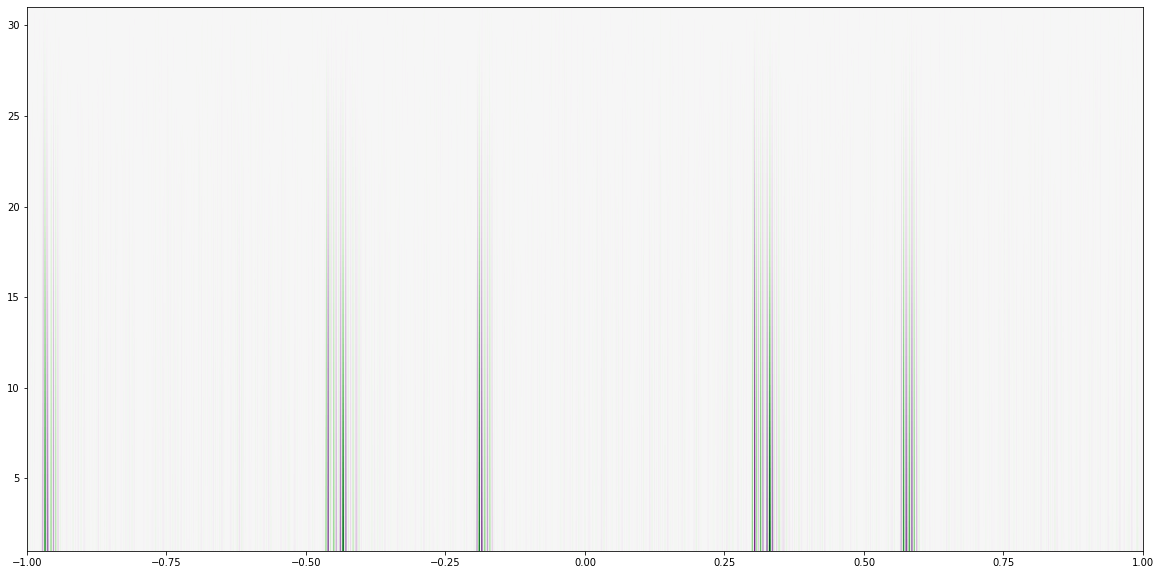

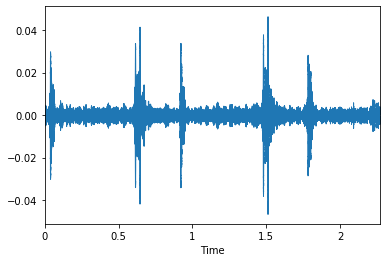

In [60]:
from scipy import signal
import matplotlib.pyplot as plt
plt.figure(figsize=[20,10])
sig  = x[50000:100000]
widths = np.arange(4, 50,0.5)
cwtmatr = signal.cwt(sig, signal.ricker, widths)
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()
librosa.display.waveplot(x[50000:100000],sr)

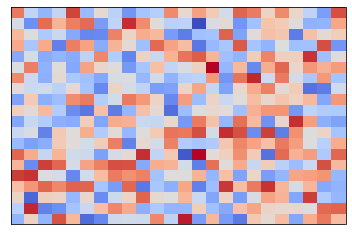

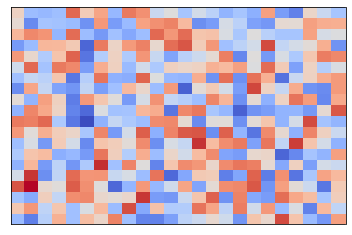

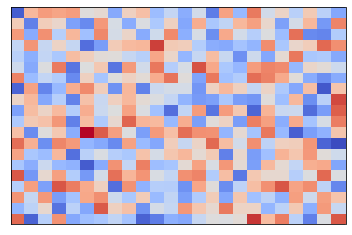

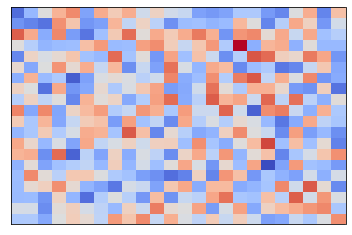

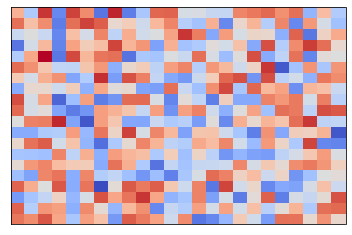

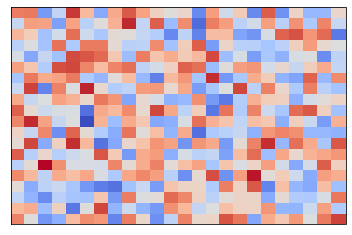

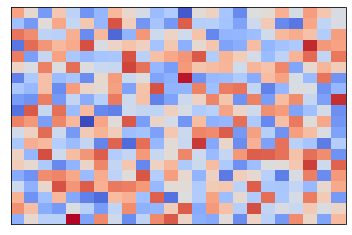

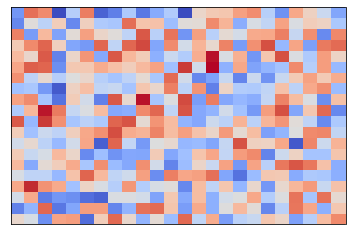

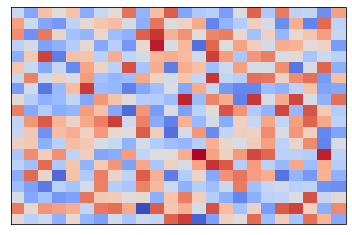

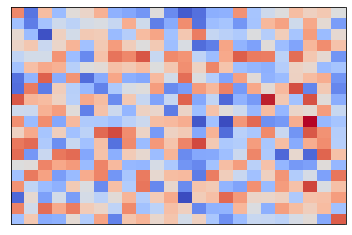

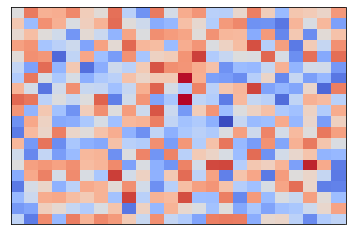

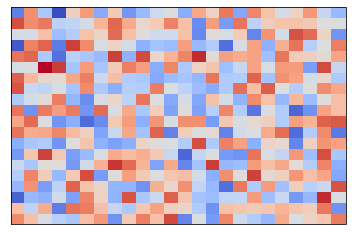

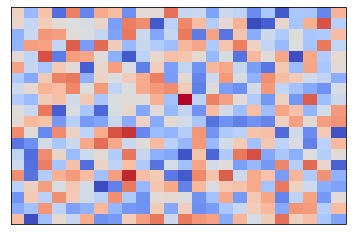

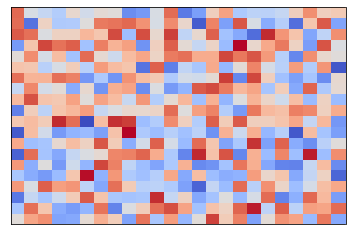

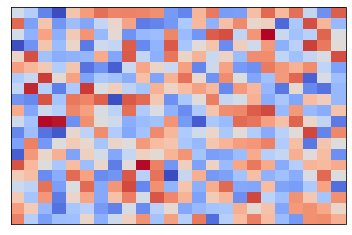

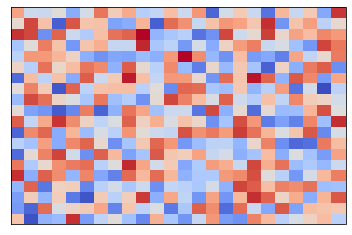

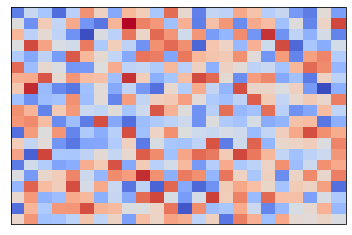

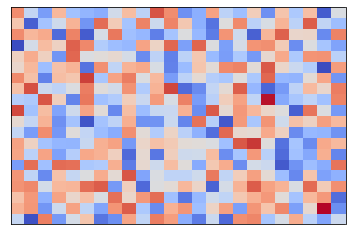

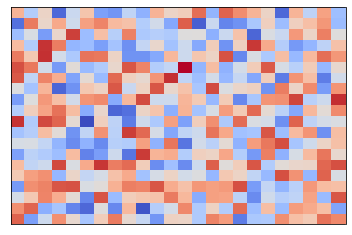

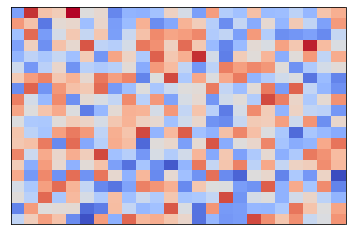

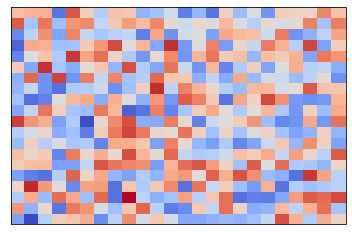

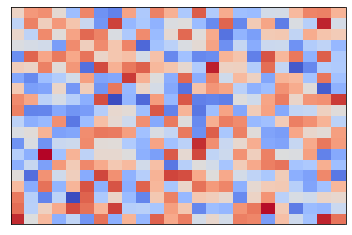

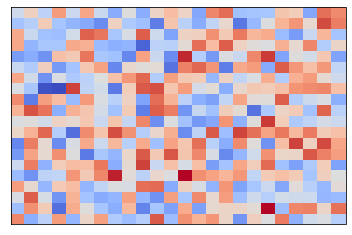

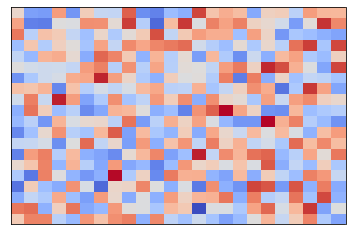

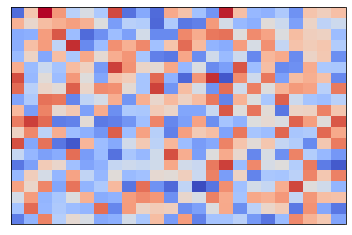

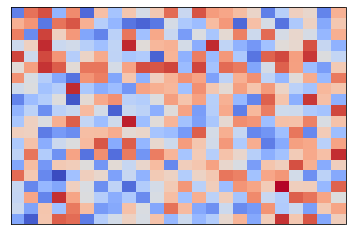

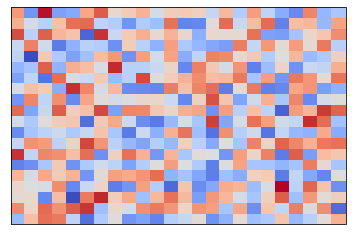

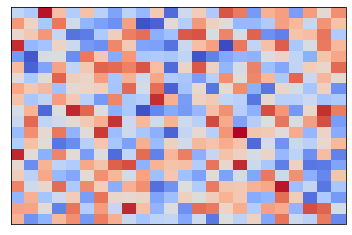

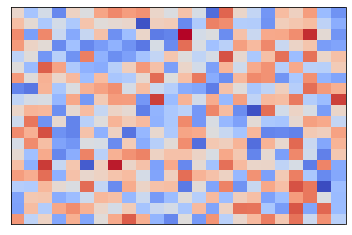

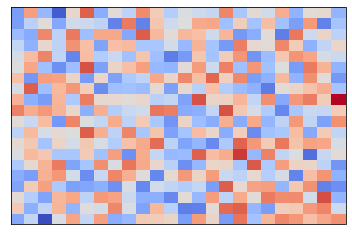

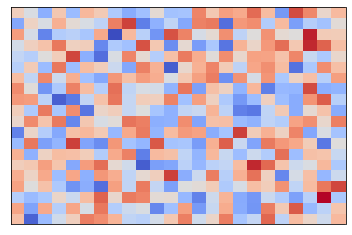

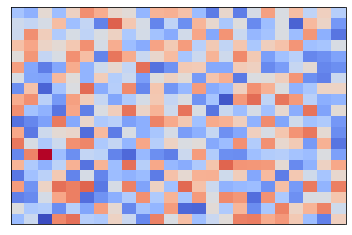

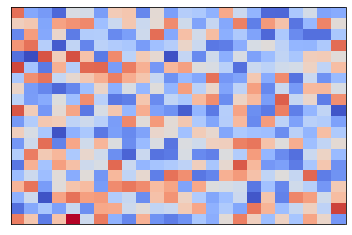

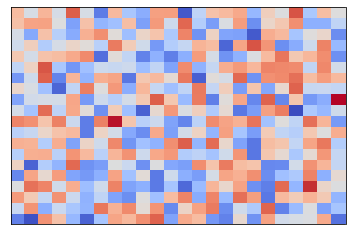

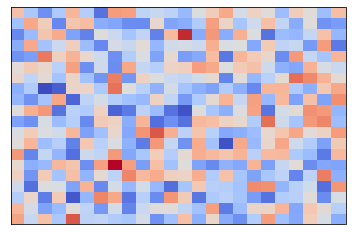

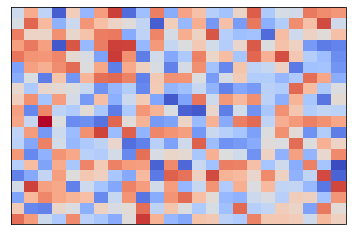

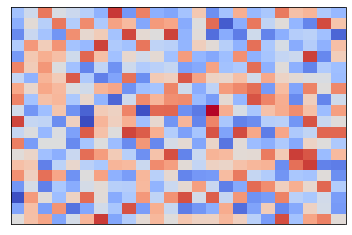

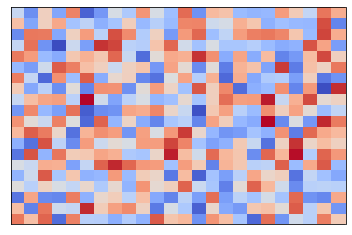

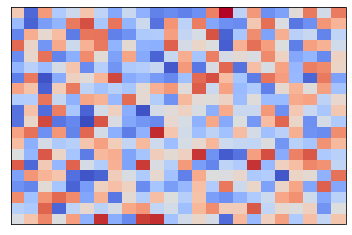

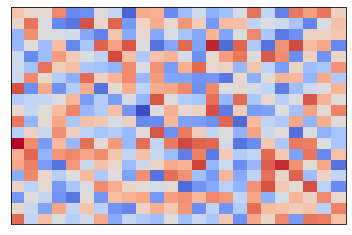

In [16]:
test_weight = keras.models.load_model('model290920.h5')
for i in range(40):
    librosa.display.specshow(test_weight.get_weights()[0][i].reshape(20,24))
    plt.show()

In [144]:
def dyn_change(data):
   """
   Случайное изменение значений
   """
   dyn_change = np.random.uniform(low=0.2,high=5)
   return (data * dyn_change)

def pitch(data, sample_rate=22050):
   """
   Настройка высоты звука
   """
   bins_per_octave = 15
   pitch_pm = 10
   pitch_change =  pitch_pm * 2*(np.random.uniform())  
   return librosa.effects.pitch_shift(data.astype('float64'),
                                     sample_rate, n_steps=pitch_change,
                                     bins_per_octave=bins_per_octave)
def shift(data):
   """
   Случайное смещение
   """
   s_range = int(np.random.uniform(low=-5, high = 5)*500)
   return np.roll(data, s_range)

def noise(data):
   """
   Добавление белого шума
   """
   # можете взять любой дистрибутив отсюда: https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html
   noise_amp = 0.05*np.random.uniform()*np.amax(data)
   data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])
   return data
def fone(data):
    return data

augment = {dyn_change,pitch,shift, noise}
name = ["Случайное изменение значения","Смещение","Случайное изменение высоты", "Белый шум"]

In [152]:
aim = 0
for j in range(target[:sr*20].shape[0]-1):
    if (target[j]!=target[j+1]):
            aim+=1
aim        

44

In [150]:

for mask in range(1<<4):
    nh = np.zeros(5)
    rs = np.zeros(5)
    for numer in range(5):
        test_pcm = x[:sr*20]
        current = ""
        for nfun, func in enumerate(augment):
            if ((1<<nfun) & mask):
                test_pcm = func(test_pcm)
                current += name[nfun]
        fd = 12228
        fs = 1024
        steps = np.arange(0,test_pcm.shape[0],fs)
        model_rez_view = np.zeros(test_pcm.shape[0])
        model_pred = np.zeros(steps.shape[0])
        for j,step in enumerate(steps):
            if test_pcm.shape[0]<=(step+fd):
                break
            frame = test_pcm[step:step+fd]
            m_htk = librosa.feature.mfcc(y=frame, sr=sr, hop_length=512,win_length=2048, n_mfcc=20)
            m_htk = (sklearn.preprocessing.scale(m_htk, axis=1)).reshape([-1,480])
            model_pred[j]= model.predict(m_htk)>0.5
            for k in range(step,(step+fd)):
                if model_pred[j]==1:
                    model_rez_view[k] = 1
                elif k>(step+fd-fs):
                    model_rez_view[k] = 0
        for j in range(model_rez_view.shape[0]-1):
            if (model_rez_view[j]!=model_rez_view[j+1]):
                nh[numer]+=1
        rs[numer] = (target[:sr*20]==model_rez_view).sum()/model_rez_view.shape[0]
    print(current, nh.mean(), rs.mean())
        #librosa.display.waveplot(fun1(np.array(x[50000:100000])),sr)
        #plt.show()

 42.0 0.6596848072562358
Случайное изменение значения 41.8 0.6777836734693878
Смещение 42.8 0.6753900226757369
Случайное изменение значенияСмещение 35.8 0.5664947845804988
Случайное изменение высоты 37.2 0.694728798185941
Случайное изменение значенияСлучайное изменение высоты 38.6 0.7018580498866214
СмещениеСлучайное изменение высоты 41.2 0.694954648526077
Случайное изменение значенияСмещениеСлучайное изменение высоты 37.4 0.6836902494331066
Белый шум 42.0 0.6596848072562358
Случайное изменение значенияБелый шум 41.4 0.6835124716553287
СмещениеБелый шум 33.2 0.5550426303854875
Случайное изменение значенияСмещениеБелый шум 34.6 0.5749863945578231
Случайное изменение высотыБелый шум 36.8 0.6956866213151927
Случайное изменение значенияСлучайное изменение высотыБелый шум 35.2 0.7116394557823129
СмещениеСлучайное изменение высотыБелый шум 40.4 0.7014208616780044
Случайное изменение значенияСмещениеСлучайное изменение высотыБелый шум 42.0 0.7027351473922903


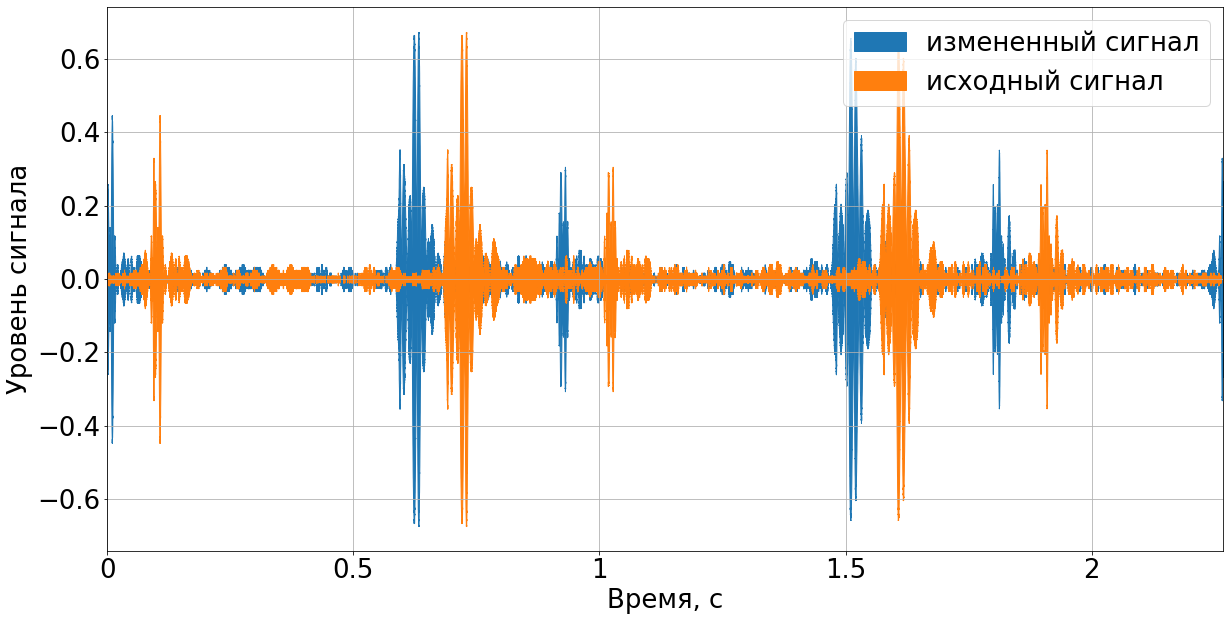

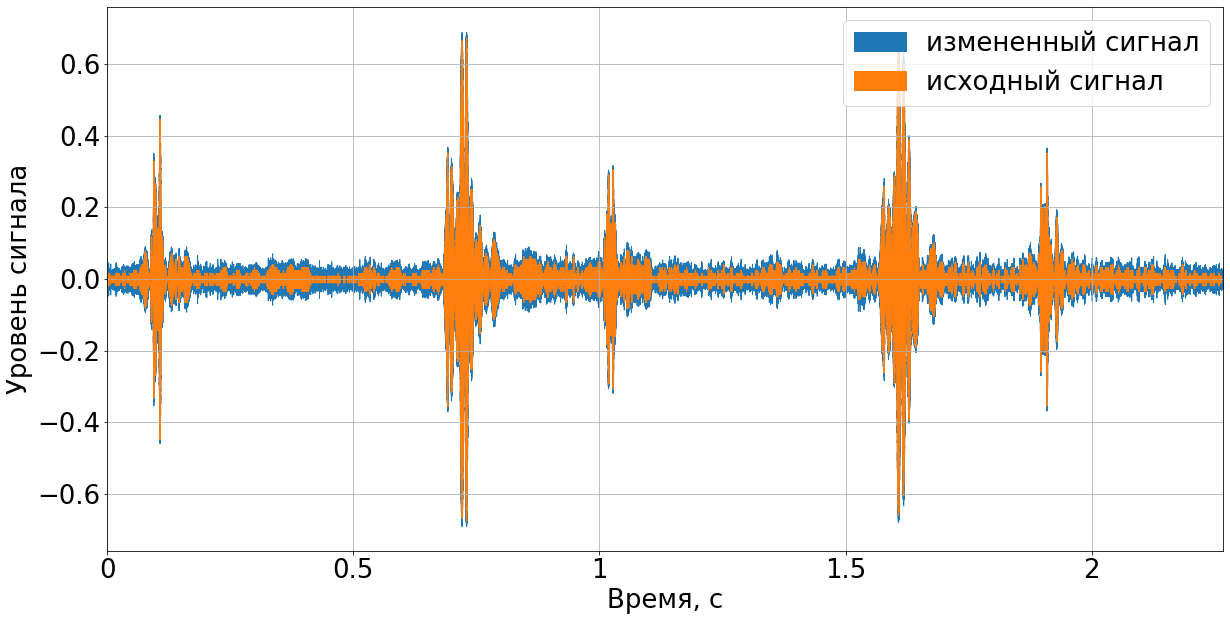

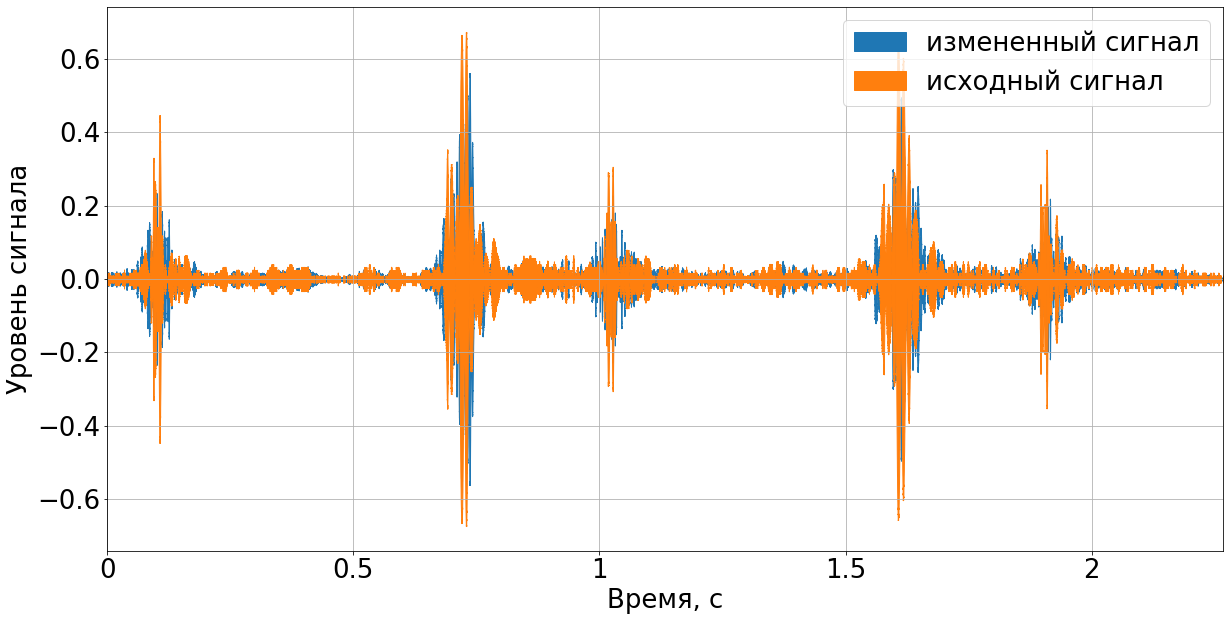

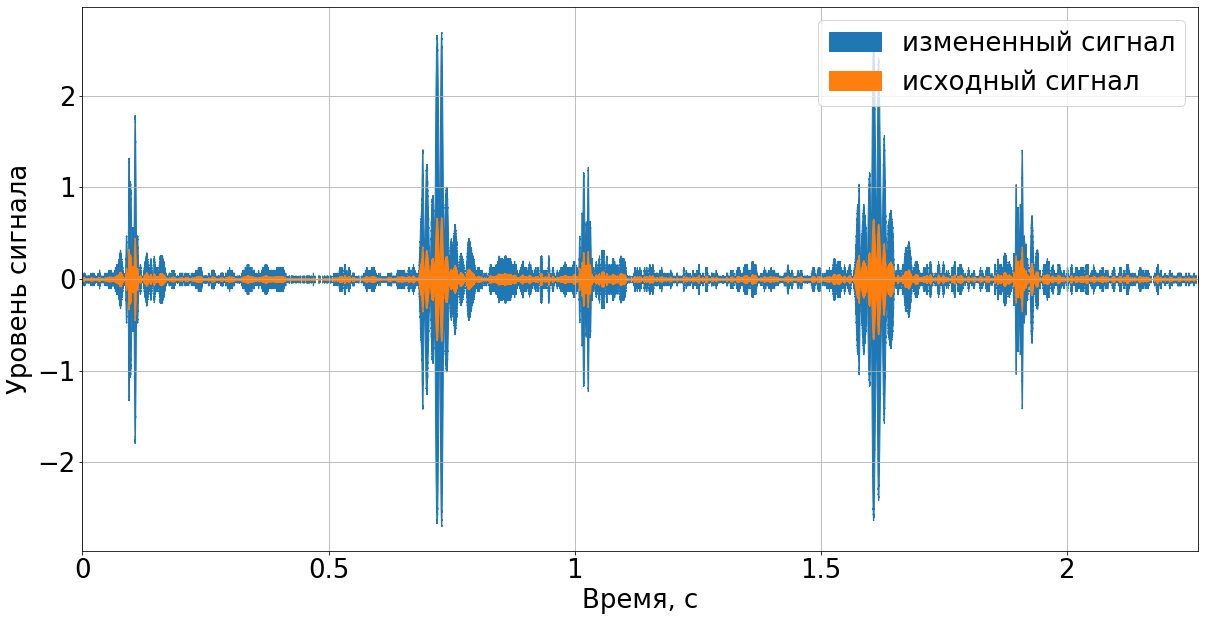

In [148]:
x,sr = librosa.load("data/wav/clear_1.wav")
#librosa.display.specshow()

#librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(x[50000:100000])),
#                                                       ref=np.max),
 #                              y_axis='log', x_axis='time')
#plt.show()

#plt.show()
#plt.figure(figsize=[20,10])
for nfun, func in enumerate(augment):
    plt.figure(figsize=[20,10])
    ax = plt.subplot(111)
    librosa.display.waveplot(func(np.array(x[50000:100000])),sr, label="измененный сигнал")
    librosa.display.waveplot(x[50000:100000],sr, label="исходный сигнал")
    plt.ylabel('Уровень сигнала', fontsize=26)
    plt.xlabel('Время, с', fontsize=26)
    for label in ax.xaxis.get_ticklabels():
        label.set_fontsize(26)
        # label - это экземпляр текста Text
        #label.set_color('red')
        #label.set_rotation(-45)
        #label.set_fontsize(15)

# Ось ориднат
    for label in ax.yaxis.get_ticklabels():
        label.set_fontsize(26)
        # line - это экземпляр плоской линии Line2D
       # line.set_color('blue')   # задаём цвет линии деления
        #line.set_markersize(14)   # задаём длину линии деления
        #line.set_markeredgewidth(3)   # задаём толщину линии деления
    #plt.title(name[nfun],fontsize=26)
    plt.grid()
    plt.legend(fontsize=26)
    plt.show()

In [110]:
x, sr = librosa.load('data/wav/clear_1.wav')
model = keras.models.load_model('best_pnn_7.10.20.h5')
model.compile()

In [56]:
file = open('data/marks/source/clear_1_e__mark.txt')
raw_mark = file.read(-1)    

start = np.zeros(len(raw_mark.split('\t\n'))-1)
end = np.zeros(len(raw_mark.split('\t\n'))-1)

for i,mark in enumerate(raw_mark.split('\t\n')):
    if len(mark)==0:
        continue
    try :
        start[i], end[i] = mark.split('\t')
    except:
        try:
            start[i], end[i] = mark.split('\t')[1].split("\n")[1],mark.split('\t')[2]
        except:
            pass
start = np.array(start*sr, dtype="int")
end = np.array(end*sr, dtype="int")
steps = range(0,end[-1], 1)
target = np.zeros(len(steps))
k=0
for i,step in enumerate(steps): 
    if step>end[k]:
        k+=1
        if k>=end.shape[0]:
            break
    if (step>start[k]) and (end[k]>step): 
        target[i]=1

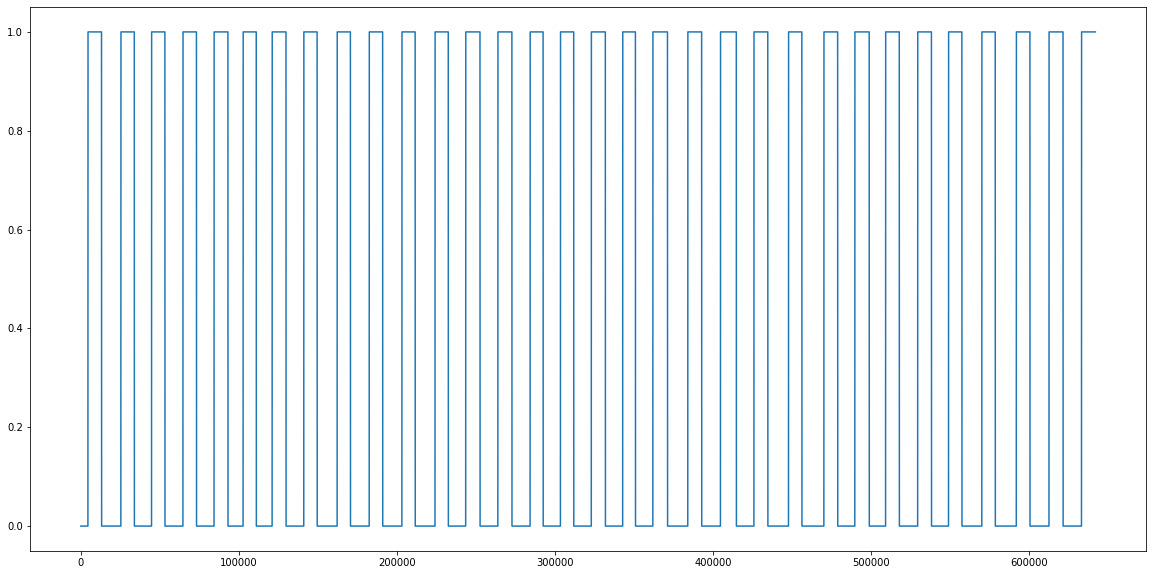

In [57]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(target)

In [116]:
%%time
test_pcm = pitch(x[:sr*10])
#test_pcm = x[:sr*10]
fd = 12228
fs = 1024
steps = np.arange(0,test_pcm.shape[0],fs)
model_rez_view = np.zeros(test_pcm.shape[0])
model_pred = np.zeros(steps.shape[0])
for j,step in enumerate(steps):
    if test_pcm.shape[0]<=(step+fd):
        break
    frame = test_pcm[step:step+fd]
    m_htk = librosa.feature.mfcc(y=frame, sr=sr, hop_length=512,win_length=2048, n_mfcc=20)
    m_htk = (sklearn.preprocessing.scale(m_htk, axis=1)).reshape([-1,480])
    model_pred[j]= model.predict(m_htk)>0.5
    for k in range(step,(step+fd)):
        if model_pred[j]==1:
            model_rez_view[k] = 1
        elif k>(step+fd-fs):
            model_rez_view[k] = 0
    

Wall time: 19 s


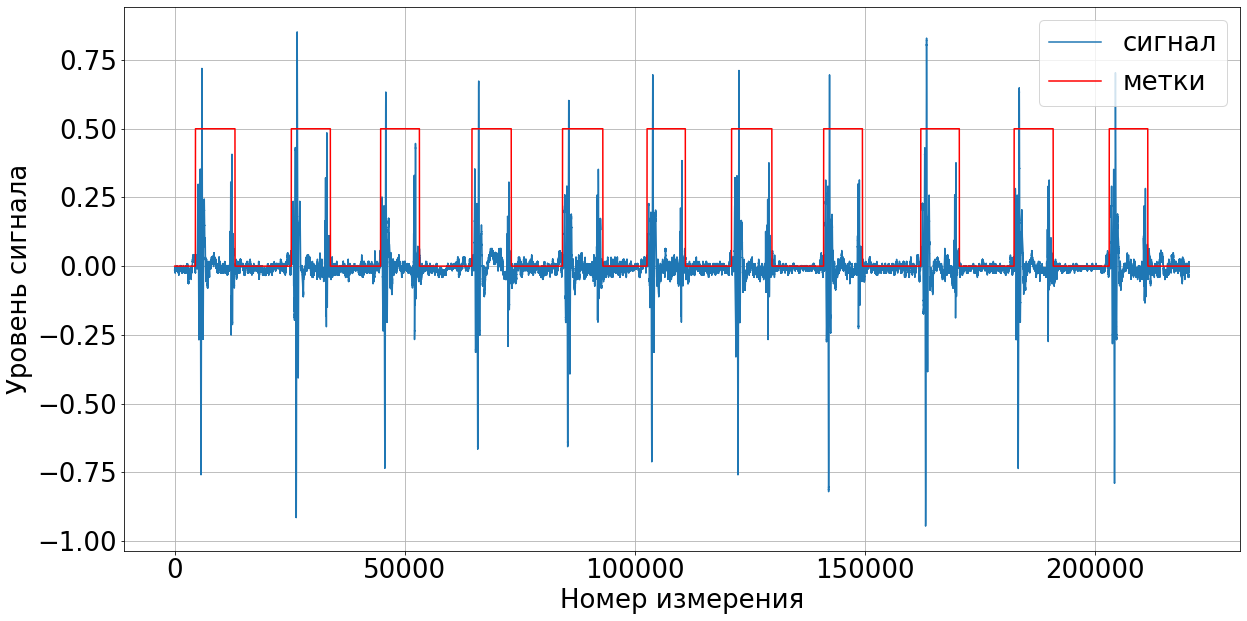

In [160]:
fig, ax = plt.subplots(figsize=(20,10))
#ax.plot(model_rez_view*0.5)
#ax.fill_between( -0.5,model_rez_view, color='lightgrey')
#plt.plot(test_pcm)
plt.plot(x[:sr*10], label="сигнал")
plt.plot(target[:sr*10]*0.5, label= "метки", color ="red")


plt.ylabel('Уровень сигнала', fontsize=26)
plt.xlabel('Номер измерения', fontsize=26)
for label in ax.xaxis.get_ticklabels():
    label.set_fontsize(26)
    # label - это экземпляр текста Text
    #label.set_color('red')
    #label.set_rotation(-45)
    #label.set_fontsize(15)

#ь ориднат
for label in ax.yaxis.get_ticklabels():
    label.set_fontsize(26)
    # line - это экземпляр плоской линии Line2D
   # line.set_color('blue')   # задаём цвет линии деления
    #line.set_markersize(14)   # задаём длину линии деления
    #line.set_markeredgewidth(3)   # задаём толщину линии деления
#plt.title(name[nfun],fontsize=26)
plt.grid()
plt.legend(fontsize=26)
plt.show()

In [122]:
(target[:sr*10]==model_rez_view).sum()/model_rez_view.shape[0]

0.6988208616780045

In [6]:
import matplotlib.pyplot as plt
import numpy as np

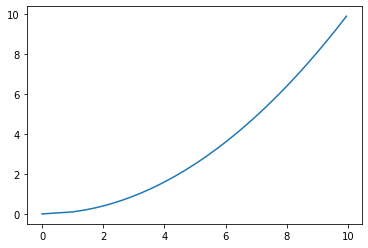

In [12]:
x = np.arange(100)
f = lambda x: x**(1/2)
y = np.arange(0, 10, 0.1)
plt.plot(f(x),y)